In [101]:
import pandas as pd
import numpy as np
from random import seed, randint
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [56]:
def display_scroll(df):
    pd.set_option("display.max_rows", None)
    display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
                 df.style.to_html() +
                 "</div>"))
    pd.set_option("display.max_rows", 20)

In [135]:
# light_train is built and saved by 'reduce_memory_usage' pipeline
train = catalog.load("light_train")
train.set_index('index', inplace=True)
display(train.head())

[04/09/23 19:34:27] INFO     Loading data from 'light_train' (PickleDataSet)...                 ]8;id=588508;file:///Users/iferreiro/miniconda3/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=208496;file:///Users/iferreiro/miniconda3/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

session_id  elapsed_time      event_name   name  level  page  \
index                                                                        
0      20090312431273200             0  cutscene_click  basic      0   NaN   
1      20090312431273200          1323    person_click  basic      0   NaN   
2      20090312431273200           831    person_click  basic      0   NaN   
3      20090312431273200          1147    person_click  basic      0   NaN   
4      20090312431273200          1863    person_click  basic      0   NaN   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
index                                                                           
0           -414.0     -159.375          380.0          494.0             NaN   
1           -414.0     -159.375          380.0          494.0             NaN   
2           -414.0     -159.375          380.0          494.0             NaN   
3           -414.0     -159.375          380.0          494.0             NaN   
4           -413.0     -159.375          381.0          494.0             NaN   

                                text    fqid                       room_fqid  \
index                                                                          
0                          undefined   intro  tunic.historicalsociety.closet   
1      Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2             Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3         I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4                Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                               text_fqid level_group  
index                                                                 
0                   tunic.historicalsociety.closet.intro         0-4  
1      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
2      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
3      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
4      tunic.historicalsociety.closet.gramps.intro_0_...         0-4

# Columns
* session_id - the ID of the session the event took place in
* index - the index of the event for the session
* elapsed_time - how much time has passed (in milliseconds) between the start of the session and when the event was recorded
* event_name - the name of the event type
* name - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)
* level - what level of the game the event occurred in (0 to 22)
* page - the page number of the event (only for notebook-related events)
* room_coor_x - the coordinates of the click in reference to the in-game room (only for click events)
* room_coor_y - the coordinates of the click in reference to the in-game room (only for click events)
* screen_coor_x - the coordinates of the click in reference to the player’s screen (only for click events)
* screen_coor_y - the coordinates of the click in reference to the player’s screen (only for click events)
* hover_duration - how long (in milliseconds) the hover happened for (only for hover events)
* text - the text the player sees during this event
* fqid - the fully qualified ID of the event
* room_fqid - the fully qualified ID of the room the event took place in
* text_fqid - the fully qualified ID of the text
* fullscreen - whether the player is in fullscreen mode
* hq - whether the game is in high-quality
* music - whether the game music is on or off
* level_group - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

Count NAs per column:

In [58]:
display(train.isna().sum())

session_id               0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
level_group              0
dtype: int64

## Event names
Explore counts of each event

In [59]:
display(train['event_name'].value_counts())

navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover               945159
notification_click      649001
notebook_click          564544
map_click               517242
observation_click       212355
checkpoint               71028
Name: event_name, dtype: int64

In [60]:
display(pd.pivot_table(train, values='session_id', index='event_name', columns='name', aggfunc='count'))

name                  basic   close   next    open   prev  undefined
event_name                                                          
checkpoint            71028       0      0       0      0          0
cutscene_click      2703035       0      0       0      0          0
map_click             46087   28623      0       0      0     442532
map_hover            945159       0      0       0      0          0
navigate_click            0       0      0       0      0   11326433
notebook_click        63416  235132  11607  235139  19250          0
notification_click   649001       0      0       0      0          0
object_click        1785270  412941      0       0      0          0
object_hover         120265       0      0       0      0     936820
observation_click    212355       0      0       0      0          0
person_click        6052853       0      0       0      0          0

Explore relationship between event names and NA values of the other columns

In [61]:
display(train[train.columns.difference(['event_name'])].isnull().groupby(train['event_name']).sum().astype(int).join(train['event_name'].value_counts()))

elapsed_time     fqid  hover_duration  level  level_group  \
event_name                                                                      
checkpoint                     0        0           71028      0            0   
cutscene_click                 0        0         2703035      0            0   
map_click                      0    74710          517242      0            0   
map_hover                      0        0               0      0            0   
navigate_click                 0  6986160        11326433      0            0   
notebook_click                 0   564544          564544      0            0   
notification_click             0   649001          649001      0            0   
object_click                   0        0         2198211      0            0   
object_hover                   0        0               0      0            0   
observation_click              0        0          212355      0            0   
person_click                   0        0         6052853      0            0   

                    name      page  room_coor_x  room_coor_y  room_fqid  \
event_name                                                                
checkpoint             0     71028        71028        71028          0   
cutscene_click         0   2703035            0            0          0   
map_click              0    517242            0            0          0   
map_hover              0    945159       945159       945159          0   
navigate_click         0  11326433            0            0          0   
notebook_click         0         0            0            0          0   
notification_click     0    649001            0            0          0   
object_click           0   2198211            0            0          0   
object_hover           0   1057085      1057085      1057085          0   
observation_click      0    212355            0            0          0   
person_click           0   6052853            0            0          0   

                    screen_coor_x  screen_coor_y  session_id      text  \
event_name                                                               
checkpoint                  71028          71028           0     71028   
cutscene_click                  0              0           0         0   
map_click                       0              0           0    517242   
map_hover                  945159         945159           0    945159   
navigate_click                  0              0           0  11326433   
notebook_click                  0              0           0    564544   
notification_click              0              0           0        66   
object_click                    0              0           0   2198211   
object_hover              1057085        1057085           0   1057085   
observation_click               0              0           0         0   
person_click                    0              0           0        39   

                    text_fqid  event_name  
event_name                                 
checkpoint              71028       71028  
cutscene_click              0     2703035  
map_click              517242      517242  
map_hover              945159      945159  
navigate_click       11326433    11326433  
notebook_click         564544      564544  
notification_click          0      649001  
object_click          2198211     2198211  
object_hover          1057085     1057085  
observation_click           0      212355  
person_click                0     6052853

### Person clicks
* Every 'name' is 'basic'
* Only 39 texts over a total of 6052853 are NAs
* Texts appear to be dialogues between Jo and the person detailed in the 'fqid'

In [62]:
person_clicks = train[train['event_name'] == 'person_click']

for col in person_clicks.columns:
    if person_clicks[col].isna().sum() == person_clicks[col].size:
        person_clicks = person_clicks.drop(col, axis = 1)
        
for col in person_clicks.select_dtypes('category').columns:
    person_clicks[col] = person_clicks[col].cat.remove_unused_categories()
  
display(person_clicks.head())
display(person_clicks[person_clicks['text'].isna()].head())

session_id  elapsed_time    event_name   name  level  \
index                                                                
1      20090312431273200          1323  person_click  basic      0   
2      20090312431273200           831  person_click  basic      0   
3      20090312431273200          1147  person_click  basic      0   
4      20090312431273200          1863  person_click  basic      0   
5      20090312431273200          3423  person_click  basic      0   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
index                                                           
1           -414.0     -159.375          380.0          494.0   
2           -414.0     -159.375          380.0          494.0   
3           -414.0     -159.375          380.0          494.0   
4           -413.0     -159.375          381.0          494.0   
5           -413.0     -157.375          381.0          492.0   

                                                    text    fqid  \
index                                                              
1                          Whatcha doing over there, Jo?  gramps   
2                                 Just talking to Teddy.  gramps   
3                             I gotta run to my meeting!  gramps   
4                                    Can I come, Gramps?  gramps   
5      Sure thing, Jo. Grab your notebook and come up...  gramps   

                            room_fqid  \
index                                   
1      tunic.historicalsociety.closet   
2      tunic.historicalsociety.closet   
3      tunic.historicalsociety.closet   
4      tunic.historicalsociety.closet   
5      tunic.historicalsociety.closet   

                                               text_fqid level_group  
index                                                                 
1      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
2      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
3      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
4      tunic.historicalsociety.closet.gramps.intro_0_...         0-4  
5      tunic.historicalsociety.closet.gramps.intro_0_...         0-4

session_id  elapsed_time    event_name   name  level  \
index                                                                
123    20100114224046390        136051  person_click  basic      1   
51     20100307371130370         64360  person_click  basic      1   
35     20110410092824040         62873  person_click  basic      1   
44     21000415482852676         30287  person_click  basic      1   
40     21000609055070864         95996  person_click  basic      1   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y text    fqid  \
index                                                                        
123      114.37500   105.437500          533.0          263.0  NaN  gramps   
51       -50.40625     9.398438          432.0          322.0  NaN  gramps   
35       124.81250   137.750000          535.0          243.0  NaN  gramps   
44        78.37500  -143.625000          509.0          416.0  NaN  gramps   
40      -132.00000   -91.562500          378.0          384.0  NaN  gramps   

                           room_fqid  \
index                                  
123    tunic.historicalsociety.entry   
51     tunic.historicalsociety.entry   
35     tunic.historicalsociety.entry   
44     tunic.historicalsociety.entry   
40     tunic.historicalsociety.entry   

                                      text_fqid level_group  
index                                                        
123    tunic.historicalsociety.entry.gramps.hub         0-4  
51     tunic.historicalsociety.entry.gramps.hub         0-4  
35     tunic.historicalsociety.entry.gramps.hub         0-4  
44     tunic.historicalsociety.entry.gramps.hub         0-4  
40     tunic.historicalsociety.entry.gramps.hub         0-4

Count different texts per group level and fqid

<Axes: xlabel='level_group', ylabel='fqid'>

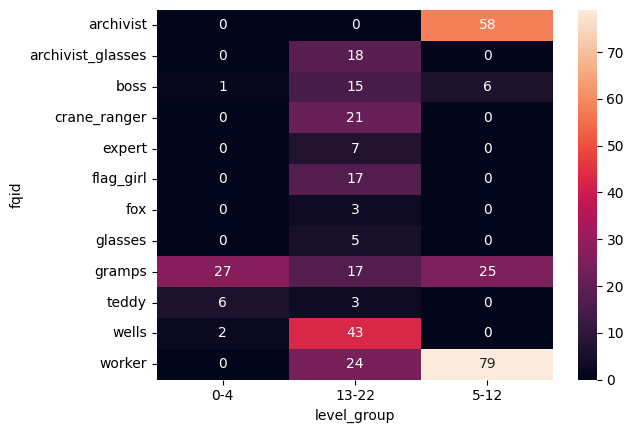

In [63]:
pc_unique_texts = person_clicks.groupby(['fqid', 'level_group'])['text'].nunique()
pc_unique_texts_pivot = pd.pivot_table(data = person_clicks, values='text', index='fqid', columns='level_group', aggfunc='nunique')
sns.heatmap(pc_unique_texts_pivot, annot = True)

In [64]:
pc_texts = person_clicks.groupby(['fqid', 'text'])['session_id'].nunique()
pc_texts = pc_texts[pc_texts != 0].reset_index()
display_scroll(pc_texts)

In [65]:
try: del(person_clicks)
except NameError: person_clicks = None
try: del(pc_unique_texts)
except NameError: pc_unique_texts = None
try: del(pc_unique_texts_pivot)
except NameError: pc_unique_texts_pivot = None
try: del(pc_texts)
except NameError: pc_texts = None

### Object clicks
* All 'names' values are 'basic'
* There is no text associated to them
* The clicked object name is in 'fqid'. All these objects have names of stuff which can contain written text

In [66]:
object_clicks = train[train['event_name'] == 'object_click']

for col in list(object_clicks.columns):
    if object_clicks[col].isna().sum() == object_clicks[col].size:
        object_clicks = object_clicks.drop(col, axis = 1)
        
for col in object_clicks.select_dtypes('category').columns:
    object_clicks[col] = object_clicks[col].cat.remove_unused_categories()
  
display(object_clicks.head())

session_id  elapsed_time    event_name   name  level  \
index                                                                
27     20090312431273200         25766  object_click  close      0   
32     20090312431273200         36433  object_click  close      1   
50     20090312431273200         57277  object_click  basic      1   
51     20090312431273200         58244  object_click  close      1   
68     20090312431273200         73927  object_click  close      2   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
index                                                           
27          -206.5      199.125          822.0           76.0   
32          -113.5      241.125          836.0           62.0   
50           856.5       69.750          839.0          291.0   
51           848.0      402.000          834.0           87.0   
68           439.0      416.000          833.0           74.0   

                    fqid                       room_fqid level_group  
index                                                                 
27              notebook  tunic.historicalsociety.closet         0-4  
32     retirement_letter  tunic.historicalsociety.closet         0-4  
50                report   tunic.historicalsociety.entry         0-4  
51                report   tunic.historicalsociety.entry         0-4  
68             directory   tunic.historicalsociety.entry         0-4

<Axes: xlabel='level_group', ylabel='name'>

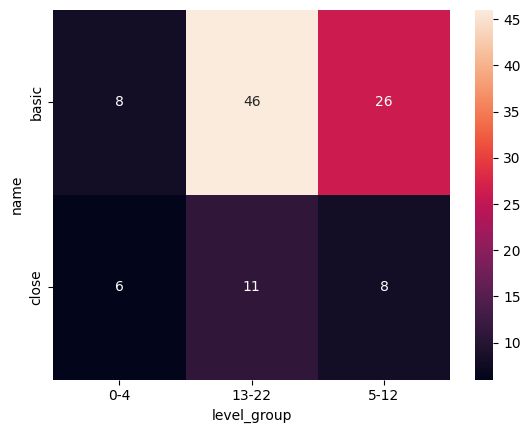

In [67]:
object_clicks_pivot = pd.pivot_table(data = object_clicks,
                                     values='fqid', index='name', columns='level_group', aggfunc='nunique')
sns.heatmap(object_clicks_pivot, annot = True)

In [68]:
distinct_obj = object_clicks.loc[:,['room_fqid', 'level_group', 'fqid', 'name']].drop_duplicates()
distinct_obj = pd.get_dummies(distinct_obj, columns = ['name'])
display(distinct_obj.head())

room_fqid level_group               fqid  \
index                                                                  
27     tunic.historicalsociety.closet         0-4           notebook   
32     tunic.historicalsociety.closet         0-4  retirement_letter   
50      tunic.historicalsociety.entry         0-4             report   
51      tunic.historicalsociety.entry         0-4             report   
68      tunic.historicalsociety.entry         0-4          directory   

       name_basic  name_close  
index                          
27              0           1  
32              0           1  
50              1           0  
51              0           1  
68              0           1

In [69]:
distinct_obj_pivot = distinct_obj.groupby(by = ['room_fqid', 'fqid']).agg({'level_group': 'nunique',
                                                                          'name_basic': 'max',
                                                                          'name_close': 'max'})
distinct_obj_pivot = distinct_obj_pivot[distinct_obj_pivot['level_group'] != 0]
display_scroll(distinct_obj_pivot)

In [70]:
try: del(object_clicks)
except NameError: object_clicks = None
try: del(object_clicks_pivot)
except NameError: object_clicks_pivot = None
try: del(distinct_obj_pivot)
except NameError: distinct_obj_pivot = None

### Observation clicks
* All 'names' are 'basic'
* 'text_fqid' is the concatenation of 'fqid' and 'room_fqid'
* Texts appear to be Jo's thoughts when observing the object detailed in fqid

In [71]:
obs_clicks = train[train['event_name'] == 'observation_click']

for col in list(obs_clicks.columns):
    if obs_clicks[col].isna().sum() == obs_clicks[col].size:
        obs_clicks = obs_clicks.drop(col, axis = 1)
        
for col in obs_clicks.select_dtypes('category').columns:
    obs_clicks[col] = obs_clicks[col].cat.remove_unused_categories()
  
display(obs_clicks.head())

session_id  elapsed_time         event_name   name  level  \
index                                                                     
13     20090312431273200         13030  observation_click  basic      0   
37     20090312431273200         41297  observation_click  basic      1   
108    20090312431273200        109825  observation_click  basic      3   
112    20090312431273200        117142  observation_click  basic      3   
256    20090312431273200        300382  observation_click  basic      6   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
index                                                           
13      487.000000    -98.56250          614.0          386.0   
37     -400.250000   -117.50000          179.0          405.0   
108      14.359375   -156.25000          444.0          485.0   
112      -7.492188    -61.71875          480.0          365.0   
256      75.625000    -32.00000          419.0          362.0   

                                       text        fqid  \
index                                                     
13     I love these photos of me and Teddy!       photo   
37         Hmm. Button's still not working.     janitor   
108                Better check back later.  outtolunch   
112        Hmm. Button's still not working.     janitor   
256     I bet the archivist could use this!     magnify   

                               room_fqid  \
index                                      
13        tunic.historicalsociety.closet   
37      tunic.historicalsociety.basement   
108       tunic.historicalsociety.stacks   
112     tunic.historicalsociety.basement   
256    tunic.historicalsociety.frontdesk   

                                       text_fqid level_group  
index                                                         
13          tunic.historicalsociety.closet.photo         0-4  
37      tunic.historicalsociety.basement.janitor         0-4  
108    tunic.historicalsociety.stacks.outtolunch         0-4  
112     tunic.historicalsociety.basement.janitor         0-4  
256    tunic.historicalsociety.frontdesk.magnify        5-12

<Axes: xlabel='level_group', ylabel='fqid'>

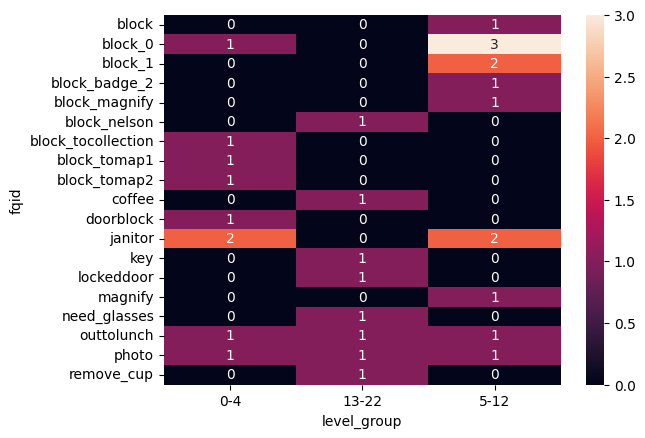

In [72]:
obs_clicks_pivot = pd.pivot_table(data = obs_clicks,
                                     values='text', index='fqid', columns='level_group', aggfunc='nunique')
sns.heatmap(obs_clicks_pivot, annot = True)

In [73]:
oc_texts = obs_clicks.groupby(['fqid', 'text', 'level_group'])['session_id'].nunique()
oc_texts = oc_texts[oc_texts != 0].reset_index()
display_scroll(oc_texts)

In [74]:
try: del(obs_clicks)
except NameError: obs_clicks = None
try: del(obs_clicks_pivot)
except NameError: obs_clicks_pivot = None

### Notification clicks
* 'names' are 'basic'
* 'fqid' is implicit in the 'text_fqid' column
* fqids of notification clicks are a subset of fqids in object clicks

In [75]:
notif_clicks = train[train['event_name'] == 'notification_click']

for col in list(notif_clicks.columns):
    if notif_clicks[col].isna().sum() == notif_clicks[col].size:
        notif_clicks = notif_clicks.drop(col, axis = 1)
        
for col in notif_clicks.select_dtypes('category').columns:
    notif_clicks[col] = notif_clicks[col].cat.remove_unused_categories()
  
display(notif_clicks.head())

session_id  elapsed_time          event_name   name  level  \
index                                                                      
26     20090312431273200         24348  notification_click  basic      0   
29     20090312431273200         32229  notification_click  basic      1   
30     20090312431273200         33063  notification_click  basic      1   
31     20090312431273200         34245  notification_click  basic      1   
85     20090312431273200         89809  notification_click  basic      2   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
index                                                           
26        -472.250   -117.93750          554.0          394.0   
29        -182.500     -1.90625          767.0          305.0   
30        -182.500    -55.87500          767.0          359.0   
31        -182.500    -55.87500          767.0          359.0   
85         -86.875    -96.81250          355.0          397.0   

                                          text  \
index                                            
26                                   Found it!   
29     Gramps is in trouble for losing papers?   
30                        This can't be right!   
31                Gramps is a great historian!   
85                     This looks like a clue!   

                                room_fqid  \
index                                       
26         tunic.historicalsociety.closet   
29         tunic.historicalsociety.closet   
30         tunic.historicalsociety.closet   
31         tunic.historicalsociety.closet   
85     tunic.historicalsociety.collection   

                                               text_fqid level_group  
index                                                                 
26               tunic.historicalsociety.closet.notebook         0-4  
29     tunic.historicalsociety.closet.retirement_lett...         0-4  
30     tunic.historicalsociety.closet.retirement_lett...         0-4  
31     tunic.historicalsociety.closet.retirement_lett...         0-4  
85         tunic.historicalsociety.collection.tunic.slip         0-4

<Axes: xlabel='level_group', ylabel='room_fqid'>

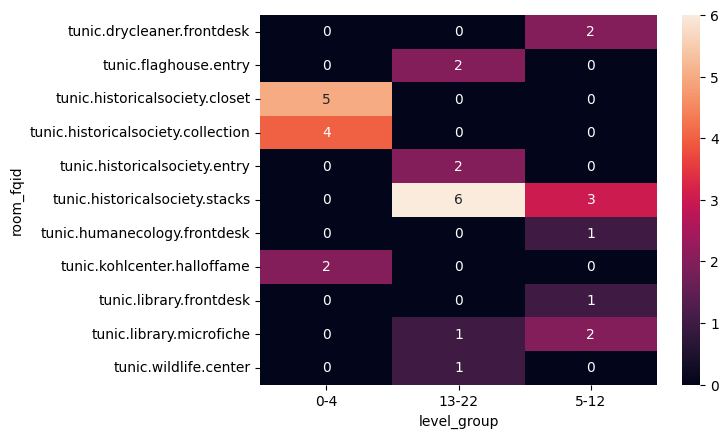

In [76]:
notif_clicks_pivot = pd.pivot_table(data = notif_clicks,
                                     values='text', index='room_fqid', columns='level_group', aggfunc='nunique')
sns.heatmap(notif_clicks_pivot, annot = True)

In [77]:
distinct_notif_clicks = notif_clicks[['room_fqid', 'text_fqid', 'text', 'name']].drop_duplicates()
distinct_notif_clicks['fqid'] = \
    [e.replace(k+'.', '') for e, k in zip(distinct_notif_clicks.text_fqid.astype('str'), distinct_notif_clicks.room_fqid.astype('str'))]

notif_clicks_text_pivot = distinct_notif_clicks.groupby(by = ['room_fqid', 'fqid'])['text'].nunique()
notif_clicks_text_pivot = notif_clicks_text_pivot[notif_clicks_text_pivot != 0]
display_scroll(notif_clicks_text_pivot.reset_index())

In [78]:
ntfc_texts = notif_clicks.groupby(['text_fqid', 'text', 'level_group'])['session_id'].nunique()
ntfc_texts = ntfc_texts[ntfc_texts != 0].reset_index()
display_scroll(ntfc_texts)

In [79]:
try: del(notif_clicks)
except NameError: notif_clicks = None
try: del(distinct_notif_clicks)
except NameError: distinct_notif_clicks = None
try: del(distinct_notif_clicks_pivot)
except NameError: distinct_notif_clicks_pivot = None

### Notebook clicks
* All types of 'names' are used, but most of them are 'open' and 'close'
* 'open' and 'close' event counts are practically the same: after you open the notebook, you close it.
* They have no text

In [80]:
noteb_clicks = train[train['event_name'] == 'notebook_click']

for col in list(noteb_clicks.columns):
    if noteb_clicks[col].isna().sum() == noteb_clicks[col].size:
        noteb_clicks = noteb_clicks.drop(col, axis = 1)
        
for col in noteb_clicks.select_dtypes('category').columns:
    noteb_clicks[col] = noteb_clicks[col].cat.remove_unused_categories()
  
display(noteb_clicks.head())

session_id  elapsed_time      event_name   name  level  page  \
index                                                                        
60     20090312433251036         60743  notebook_click   open      2   0.0   
61     20090312433251036         61761  notebook_click  close      2   0.0   
209    20090312433251036        351064  notebook_click   open      6   1.0   
210    20090312433251036        354779  notebook_click  basic      6   1.0   
211    20090312433251036        357947  notebook_click  close      6   1.0   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
index                                                           
60       -1112.000      -518.50           30.0          639.0   
61          73.250       428.25          789.0           58.0   
209       -490.750      -429.75           61.0          629.0   
210        -97.625      -304.25          343.0          539.0   
211        556.000       342.50          812.0           75.0   

                              room_fqid level_group  
index                                                
60        tunic.historicalsociety.entry         0-4  
61        tunic.historicalsociety.entry         0-4  
209    tunic.historicalsociety.basement        5-12  
210    tunic.historicalsociety.basement        5-12  
211    tunic.historicalsociety.basement        5-12

<Axes: xlabel='page-name', ylabel='level'>

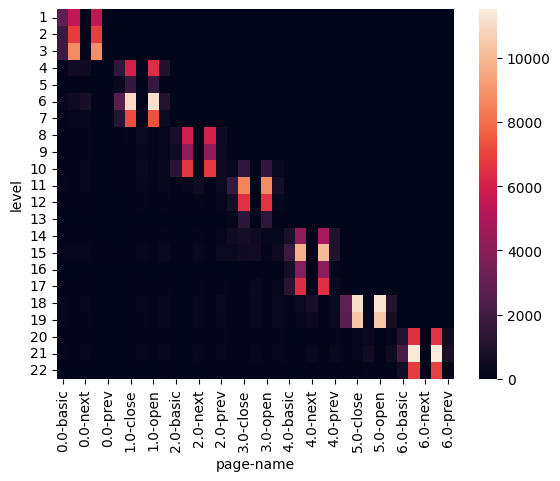

In [81]:
noteb_clicks_pivot = pd.pivot_table(data = noteb_clicks,
                                     values='session_id', index='level', columns=['page', 'name'], aggfunc='nunique')
sns.heatmap(noteb_clicks_pivot, annot = False)

In [82]:
try: del(noteb_clicks)
except NameError: noteb_clicks = None
try: del(noteb_clicks_pivot)
except NameError: noteb_clicks_pivot = None

### Cutscene clicks
* 'names' are 'basic'
* 'text_fqid' is the concatenation of 'room_fqid' and 'fqid'

In [83]:
cuts_clicks = train[train['event_name'] == 'cutscene_click']

for col in list(cuts_clicks.columns):
    if cuts_clicks[col].isna().sum() == cuts_clicks[col].size:
        cuts_clicks = cuts_clicks.drop(col, axis = 1)
        
for col in cuts_clicks.select_dtypes('category').columns:
    cuts_clicks[col] = cuts_clicks[col].cat.remove_unused_categories()
  
display(cuts_clicks.head())

session_id  elapsed_time      event_name   name  level  \
index                                                                  
0      20090312431273200             0  cutscene_click  basic      0   
41     20090312431273200         45062  cutscene_click  basic      1   
42     20090312431273200         46046  cutscene_click  basic      1   
43     20090312431273200         47362  cutscene_click  basic      1   
44     20090312431273200         48112  cutscene_click  basic      1   

       room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
index                                                           
0        -414.0000   -159.37500          380.0          494.0   
41         93.8125    -60.34375          338.0          368.0   
42        134.0000    -85.68750          390.0          386.0   
43        125.9375    -83.37500          390.0          385.0   
44        123.6875    -80.06250          389.0          383.0   

                                                    text        fqid  \
index                                                                  
0                                              undefined       intro   
41     Let's get started. The Wisconsin Wonders exhib...  groupconvo   
42          Who wants to investigate the shirt artifact?  groupconvo   
43     Not Leopold here. He's been losing papers lately.  groupconvo   
44                                                  Hey!  groupconvo   

                            room_fqid  \
index                                   
0      tunic.historicalsociety.closet   
41      tunic.historicalsociety.entry   
42      tunic.historicalsociety.entry   
43      tunic.historicalsociety.entry   
44      tunic.historicalsociety.entry   

                                      text_fqid level_group  
index                                                        
0          tunic.historicalsociety.closet.intro         0-4  
41     tunic.historicalsociety.entry.groupconvo         0-4  
42     tunic.historicalsociety.entry.groupconvo         0-4  
43     tunic.historicalsociety.entry.groupconvo         0-4  
44     tunic.historicalsociety.entry.groupconvo         0-4

In [84]:
distinct_cuts_clicks = cuts_clicks[['room_fqid', 'fqid', 'text', 'level_group']].drop_duplicates()
distinct_cuts_clicks = pd.get_dummies(distinct_cuts_clicks, columns = ['level_group'])

In [85]:
cuts_clicks_pivot = distinct_cuts_clicks.groupby(by = ['room_fqid', 'fqid',
                                                       'level_group_0-4', 'level_group_13-22',
                                                       'level_group_5-12'])['text'].count()
cuts_clicks_pivot = cuts_clicks_pivot[cuts_clicks_pivot != 0]
display_scroll(cuts_clicks_pivot.reset_index())

Verify that the different texts do not have different ids

In [86]:
wh = cuts_clicks.loc[cuts_clicks['fqid'] == 'what_happened',['text', 'text_fqid', 'room_fqid']].drop_duplicates()
wh['text_id'] = \
    [e.replace(k+'.', '') for e, k in zip(wh.text_fqid.astype('str'), wh.room_fqid.astype('str'))]
display(wh)

text  \
index                                                  
188                                           Oh no!   
189                                        undefined   
190                             What happened here?!   
191                                    I don't know!   
192       I got here and the whole place was a mess!   
166                                        What the-   
188    I got here and the whole place was ransacked!   

                                               text_fqid  \
index                                                      
188    tunic.historicalsociety.closet_dirty.what_happ...   
189    tunic.historicalsociety.closet_dirty.what_happ...   
190    tunic.historicalsociety.closet_dirty.what_happ...   
191    tunic.historicalsociety.closet_dirty.what_happ...   
192    tunic.historicalsociety.closet_dirty.what_happ...   
166    tunic.historicalsociety.closet_dirty.what_happ...   
188    tunic.historicalsociety.closet_dirty.what_happ...   

                                  room_fqid        text_id  
index                                                       
188    tunic.historicalsociety.closet_dirty  what_happened  
189    tunic.historicalsociety.closet_dirty  what_happened  
190    tunic.historicalsociety.closet_dirty  what_happened  
191    tunic.historicalsociety.closet_dirty  what_happened  
192    tunic.historicalsociety.closet_dirty  what_happened  
166    tunic.historicalsociety.closet_dirty  what_happened  
188    tunic.historicalsociety.closet_dirty  what_happened

In [87]:
cc_texts = cuts_clicks.groupby(['text_fqid', 'level_group', 'text'])['session_id'].nunique()
cc_texts = cc_texts[cc_texts != 0].reset_index()
display_scroll(cc_texts)

In [88]:
try: del(cuts_clicks)
except NameError: cuts_clicks = None
try: del(distinct_cuts_clicks)
except NameError: distinct_cuts_clicks = None
try: del(cuts_clicks_pivot)
except NameError: cuts_clicks_pivot = None
try: del(wh)
except NameError: wh = None

## Sessions
Histogram of events count per session

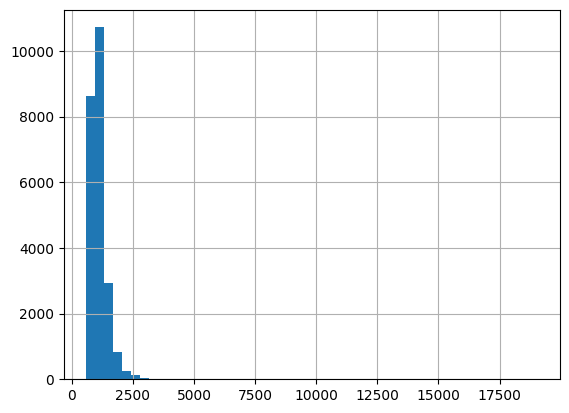

In [89]:
train.groupby('session_id')['elapsed_time'].count().hist(bins = 50)
plt.show()

Number of sessions

In [99]:
n_sessions = train['session_id'].nunique()
print(n_sessions)

23562


Verification of the fact that every session has reached to the last level

In [91]:
train.groupby('session_id')['level'].max().max()

22

Exploration of the event counts in each session

event_name         checkpoint  cutscene_click  map_click  map_hover  \
session_id                                                            
20090312431273200           3             100         16         27   
20090312433251036           3             112         64        219   
20090312455206810           3             120         19         30   
20090313091715820           3             112         18         39   
20090313571836404           3              92         18         15   

event_name         navigate_click  notebook_click  notification_click  \
session_id                                                              
20090312431273200             354               0                  27   
20090312433251036             801              59                  28   
20090312455206810             247              32                  24   
20090313091715820             416               9                  28   
20090313571836404             279              11                  25   

event_name         object_click  object_hover  observation_click  person_click  
session_id                                                                      
20090312431273200            59            38                  8           249  
20090312433251036           172           103                 10           260  
20090312455206810            40            24                  4           215  
20090313091715820            79            45                 10           234  
20090313571836404            42            31                  8           222

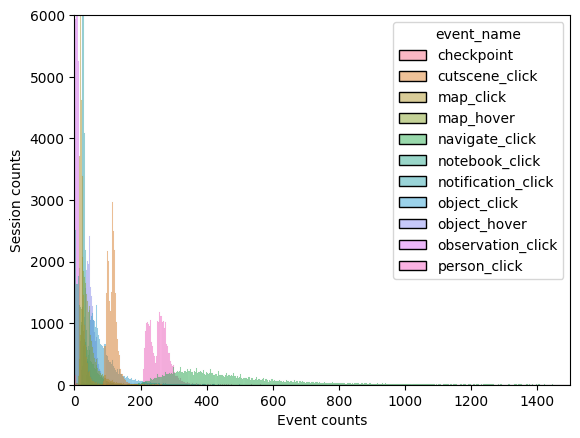

In [92]:
events_per_session = pd.pivot_table(train, values='elapsed_time', index='session_id', columns='event_name', aggfunc='count')
display(events_per_session.head())
ax1 = sns.histplot(data = events_per_session.reset_index(drop=True))
ax1.set_xlim(0,1500)
ax1.set_ylim(0,6000)
ax1.set_xlabel('Event counts')
ax1.set_ylabel('Session counts')
plt.show()

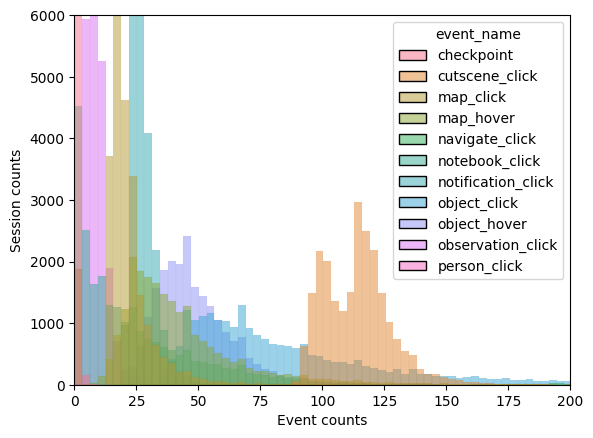

In [93]:
ax2 = sns.histplot(data = events_per_session.reset_index(drop=True))
ax2.set_xlim(0,200)
ax2.set_ylim(0,6000)
ax2.set_xlabel('Event counts')
ax2.set_ylabel('Session counts')
plt.show()

In [94]:
events_per_level_session = pd.pivot_table(train, values='elapsed_time',
                                             index=['session_id', 'level_group'],
                                             columns='event_name', aggfunc='count').reset_index()
display(events_per_level_session.head())
epls_pivot = events_per_level_session.drop('session_id', axis = 1)

event_name         session_id level_group  checkpoint  cutscene_click  \
0           20090312431273200         0-4           1              28   
1           20090312431273200       13-22           1              60   
2           20090312431273200        5-12           1              12   
3           20090312433251036         0-4           1              36   
4           20090312433251036       13-22           1              65   

event_name  map_click  map_hover  navigate_click  notebook_click  \
0                   2          4              81               0   
1                   6         14             170               0   
2                   8          9             103               0   
3                   3          3              49               2   
4                  45        186             637              50   

event_name  notification_click  object_click  object_hover  observation_click  \
0                            8            11             4                  4   
1                           10            20            13                  3   
2                            9            28            21                  1   
3                            5            15             5                  2   
4                           14            83            66                  5   

event_name  person_click  
0                     22  
1                    123  
2                    104  
3                     18  
4                    145

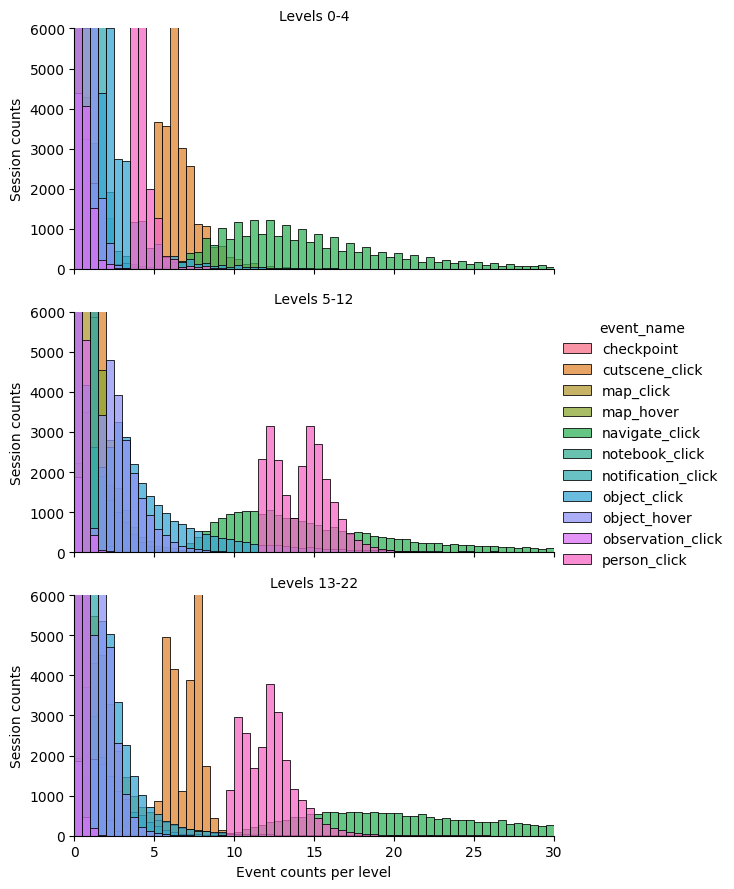

In [95]:
epls = train.groupby(['session_id', 'level_group', 'event_name'])['elapsed_time']. \
    count().reset_index().drop('session_id', axis = 1).rename({'elapsed_time': 'event_counts'}, axis = 1)
epls['levels'] = np.where(epls['level_group'] == '0-4', 5,
                         np.where(epls['level_group'] == '5-12', 8, 10))
epls['events_per_level'] = epls['event_counts'] / epls['levels']
epls.drop(['event_counts', 'levels'], axis = 1, inplace = True)
grid = sns.FacetGrid(data = epls, row='level_group', row_order=['0-4','5-12','13-22'], aspect = 2, hue = 'event_name', )
h = grid.map_dataframe(sns.histplot, x = 'events_per_level', bins = np.arange(0,31,0.5))
h.set_titles('Levels {row_name}')
h.set_xlabels('Event counts per level')
h.set_ylabels('Session counts')
h.set(xlim=(0,30),ylim=(0,6000))
grid.add_legend()

### Text frequency

In [136]:
texts_by_session = train.groupby(['text_fqid', 'text'])['session_id'].nunique().reset_index()
text_by_session = text_by_session[text_by_session['session_id']>0]
display_scroll(text_by_session.sort_values(by='session_id', ascending=False))
train = train.merge(text_by_session, how = 'left', on = ['text_fqid', 'text'], suffixes = ['', '_y'])
# 'tf' is text frequency: the percentage of sessions where the text appears
train['tf'] = train['session_id_y'] / n_sessions
train.drop('session_id_y', axis=1, inplace = True)
display(train.head())

session_id  elapsed_time      event_name   name  level  page  \
0  20090312431273200             0  cutscene_click  basic      0   NaN   
1  20090312431273200          1323    person_click  basic      0   NaN   
2  20090312431273200           831    person_click  basic      0   NaN   
3  20090312431273200          1147    person_click  basic      0   NaN   
4  20090312431273200          1863    person_click  basic      0   NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0       -414.0     -159.375          380.0          494.0             NaN   
1       -414.0     -159.375          380.0          494.0             NaN   
2       -414.0     -159.375          380.0          494.0             NaN   
3       -414.0     -159.375          380.0          494.0             NaN   
4       -413.0     -159.375          381.0          494.0             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3     I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4            Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                           text_fqid level_group        tf  
0               tunic.historicalsociety.closet.intro         0-4  0.999618  
1  tunic.historicalsociety.closet.gramps.intro_0_...         0-4  0.999618  
2  tunic.historicalsociety.closet.gramps.intro_0_...         0-4  0.999618  
3  tunic.historicalsociety.closet.gramps.intro_0_...         0-4  0.999618  
4  tunic.historicalsociety.closet.gramps.intro_0_...         0-4  0.482981

### Exploration of session examples

In [137]:
seed(42)
n_examples = 3
session_ids = train['session_id'].drop_duplicates().reset_index(drop = True)
for i in range(n_examples):
    session_index = randint(0,n_sessions)
    session_id = session_ids[session_index]
    display('Session id '+str(session_id))
    display_scroll(train.loc[train['session_id'] == session_id,['elapsed_time', 'event_name', 'name', 'level', 'text', 'fqid', 'tf', 'room_fqid', 'text_fqid']])

0    20090312431273200
1    20090312433251036
2    20090312455206810
3    20090313091715820
4    20090313571836404
Name: session_id, dtype: int64

'Session id 22030615042529772'

'Session id 21000212303186084'

'Session id 20100409434683164'

The fact that there are similar texts appearing in different sessions can be explained by the fact that there are different versions of the game with varying "humor" and "snark". See [this repo](https://github.com/fielddaylab/jo_wilder), [this paper](https://learninganalytics.upenn.edu/ryanbaker/GLS2022.pdf) and [this blog post](https://medium.com/fielddaylab/three-creative-ways-to-learn-from-a-learning-game-d577dbff006c).
In some sessions, there seems to be some chunks of time where the player is lost, e.g. not finding the key to Teddy's cage in level 15 in session 22030615042529772. These periods where the player is lost might explain why some sessions have large quantities of navigation and person clicks.
Click quantity / quality is definitely a feature I want to use.

# Hypothesis for feature engineering based on this EDA
## Time elapsed between events
* The shorter the time spent in each level, the better the performance
* The time_elapsed between some key events of the game is more important than others to predict performance
* There might be some cases where time passes due to inactivity of the player, and this inactivity is not necessarily a good predictor of performance
## Map, person and object clicks
* Some map clicks can be considered "correct" in between some key events, and "incorrect" between other key events. Incorrect map clicks can be predictors of bad performance
* Clicks with 100% of occurrence between sessions can be considered to be "correct"
* Incorrect map clicks correlate positively with high values of time spent in levels
## Humor and snarkiness
* Humor and snarkiness of the session can be inferred from the texts
* The humor and snarkiness of the session influence the performance

# Next steps
## Baseline model
1. Explore correlation between time_elapsed per level and performance
2. Build a baseline model with time_elapsed per level as predictor
3. Submit that baseline model
4. Diagnose the baseline model and redefine next steps